In [1]:
import sys
sys.path.append('../ml_utils')

import data_utils

import vaex
from vaex.ui.colormaps import cm_plusmin

import timeit
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
base_dir = './../shared/data/'

In [3]:
# Open the converted data

log_data = base_dir + 'swissid_oidc_logs_april_to_sept_2019.hdf5'

# Read in the data from disk
oidc_df = vaex.open(log_data)

In [4]:
#oidc_df

## Start the Analysis

In [5]:
oidc_df.count()

array(23154543)

In [6]:
# Get a high level overview of the DataFrame
oidc_df.describe()

,time_stamp,label_nr,date_day,date_month,date_month_nr,date_year,date_hour,date_minute,date_second,src_ip,...,loc_country,loc_region,loc_city,loc_country_code,loc_latitude,loc_longitude,loc_zip_code,loc_time_zone,ldap_user,index
dtype,str,int64,int64,str,int64,int64,int64,int64,int64,str,...,str,str,str,str,float64,float64,str,str,str,int64
count,23154543,23154543,23154543,23154543,23154543,23154543,23154543,23154543,23154543,23154543,...,23154543,23154543,23154543,23154543,23154543,23154543,23154543,23154543,23154543,23154543
NA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mean,--,0.0,15.921054153390115,--,6.684708827982483,2019.0,12.053703759128393,29.447479917871842,29.32275070166576,--,...,--,--,--,--,25.733640693893648,4.2368079201403575,--,--,--,11577271.0
std,--,0,8.56857,--,1.73137,0,5.09993,17.3112,17.3617,--,...,--,--,--,--,23.5603,11.5566,--,--,--,6.68414e+06
min,--,0,1,--,4,2019,0,0,0,--,...,--,--,--,--,-54.8,-178.967,--,--,--,0
max,--,0,31,--,9,2019,23,59,59,--,...,--,--,--,--,72.7868,178.441,--,--,--,23154542


In [7]:
# Helper Function to sort the data based on the months

month_list=['january','february','march','april','may','june','july',
            'august','september','october','november','december']

def sort(df, month_col, value_col):
    
    m_list = df[month_col].tolist()
    v_list = df[value_col].tolist()
    
    x = []
    y = []
    
    for m in month_list:
        if m in m_list:
            x.append(m)
            y.append(v_list[m_list.index(m)])
        
    return x,y

## API Zugriffe pro Monat

In [8]:
# Create a ranking list
calls_per_month = oidc_df.groupby(oidc_df.date_month, agg='count').sort('count', ascending=False)
calls_per_month

#,date_month,count
0,september,4.66405e+06
1,august,4.27707e+06
2,july,3.86119e+06
3,may,3.78828e+06
4,april,3.38254e+06
5,june,3.18142e+06


In [9]:
# just to show how to work with vaex data
calls_per_month['date_month'].tolist()

['september', 'august', 'july', 'may', 'april', 'june']

In [10]:
# just to show how to work with vaex data
type(calls_per_month)

vaex.dataframe.DataFrameArrays

In [11]:
# just to show how to work with vaex data
calls_per_month.columns

OrderedDict([('date_month', <vaex.column.ColumnIndexed at 0x7fd02023f750>),
             ('count', <vaex.column.ColumnIndexed at 0x7fd07051aad0>),
             ('__count_1', <vaex.column.ColumnIndexed at 0x7fd07051a7d0>)])

In [12]:
# just to show how to work with vaex data
y = calls_per_month['count'].tolist()
y

[4664050, 4277066, 3861191, 3788275, 3382539, 3181422]

In [13]:
# just to show how to work with vaex data
x = calls_per_month.date_month.values.tolist()
x

['september', 'august', 'july', 'may', 'april', 'june']

In [14]:
x,y = sort(calls_per_month, 'date_month', 'count')
x,y

(['april', 'may', 'june', 'july', 'august', 'september'],
 [3382539, 3788275, 3181422, 3861191, 4277066, 4664050])

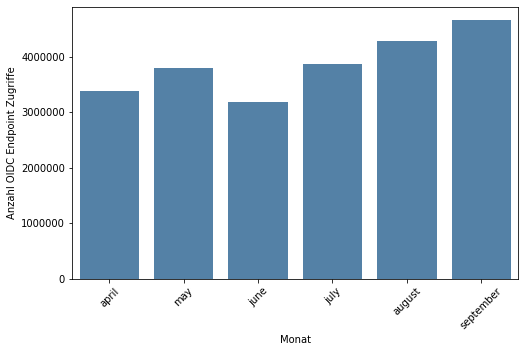

In [15]:
# Plot the result
plt.figure(figsize=(8, 5))
sns.barplot(x=x, y=y, color='steelblue')
plt.xlabel('Monat')
plt.ylabel('Anzahl OIDC Endpoint Zugriffe')
plt.xticks(rotation='45')
plt.show()

[########################################]:  100.00% elapsed time  :        0s =  0.0m =  0.0h
 

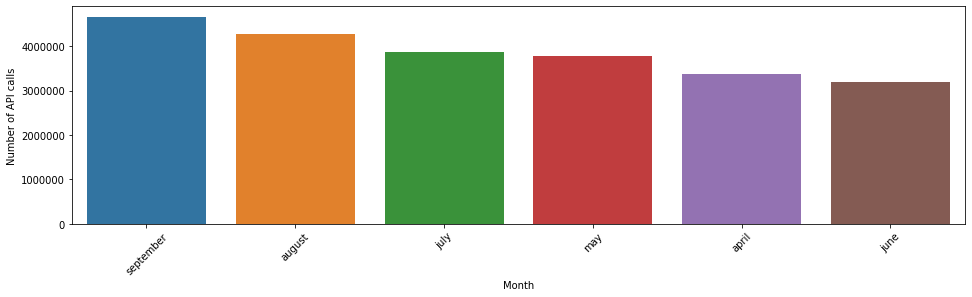

In [16]:
# just to show how to work with vaex data
# The same as above but the easier way
num_calls_per_month = oidc_df.date_month.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=num_calls_per_month.index, y=num_calls_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of API calls')
plt.xticks(rotation='45')
plt.show()

## Anzahl OIDC-EP Zugriffe

In [17]:
num_calls_per_ep = oidc_df.uri_path.value_counts(progress=True)
num_calls_per_ep

[########################################]:  100.00% elapsed time  :        0s =  0.0m =  0.0h
 

authorize                           12434708
access_token                         6067829
connect/jwk_uri                      4123474
.well-known/openid-configuration      188975
userinfo                              135718
introspect                            128612
users/applications                     55006
connect/endSession                     20030
users/applications/client                187
-                                          4
dtype: int64

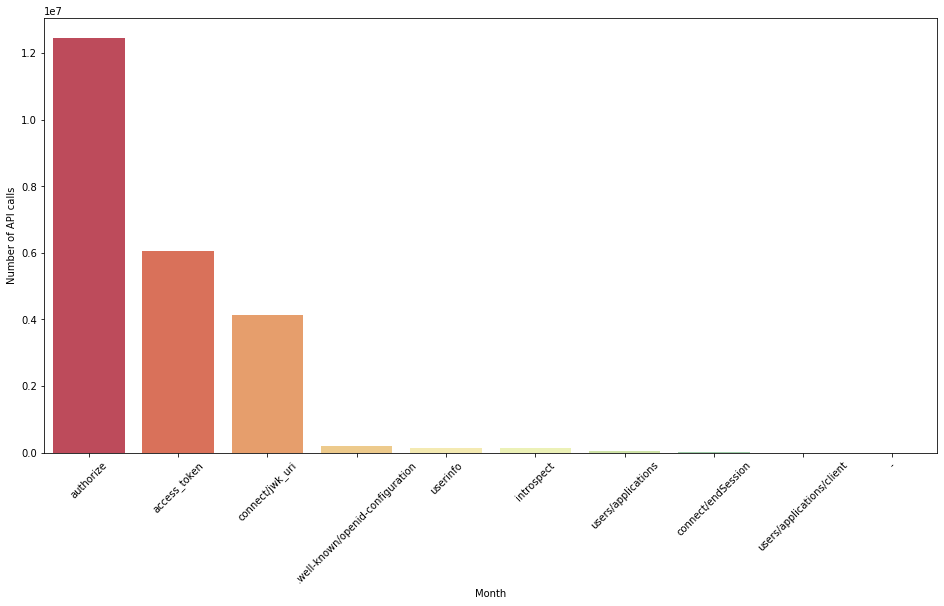

In [18]:
# Plot the result
plt.figure(figsize=(16, 8))
sns.barplot(x=num_calls_per_ep.index, y=num_calls_per_ep.values, palette='Spectral')
plt.xlabel('Month')
plt.ylabel('Number of API calls')
plt.xticks(rotation='45')
plt.show()

## Geographische Verteilung der SwissID Zugriffe

In [19]:
# Create a ranking list
calls_per_country = oidc_df.groupby(oidc_df.loc_country, agg='count').sort('count', ascending=False)
calls_per_country

#,loc_country,count
0,Switzerland,11478670
1,-,10360033
2,Germany,371102
3,Italy,116565
4,France,115331
...,...,...
213,Samoa,5
214,Marshall Islands,3
215,"Micronesia, Federated States of",2
216,Wallis and Futuna,2


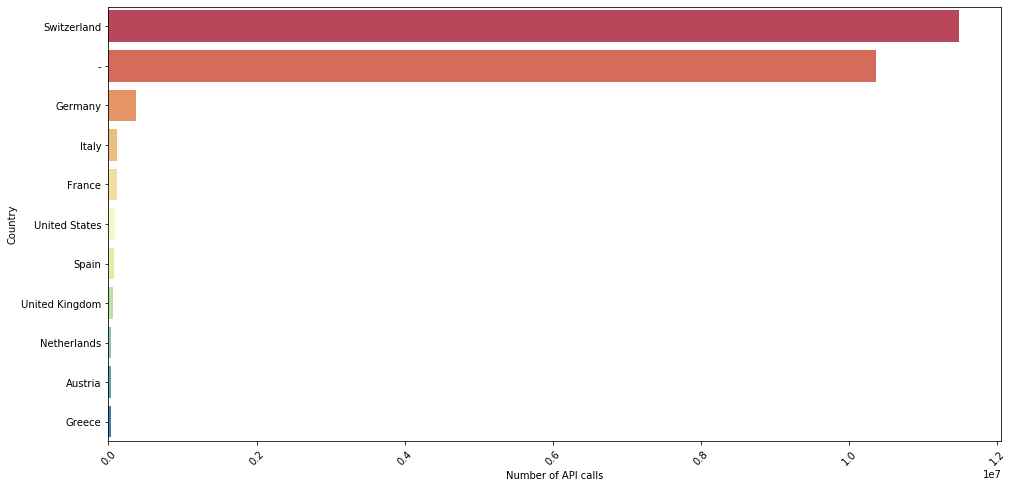

In [20]:
# Plot the result
country_top_10 = calls_per_country[calls_per_country['count'] > 30000]

plt.figure(figsize=(16, 8))
sns.barplot(y=country_top_10['loc_country'].tolist(), 
            x=country_top_10['count'].tolist(), palette='Spectral')
plt.xlabel('Number of API calls')
plt.ylabel('Country')
plt.xticks(rotation='45')
plt.show()

In [21]:
oidc_df.plot_widget(oidc_df.loc_longitude, 
               oidc_df.loc_latitude, 
               shape=256, 
               limits='minmax',
               f='log1p', 
               colormap='plasma')

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='count(*)', x='loc_longitude', y='loc_latitude', z=None)

In [22]:
swiss_df = oidc_df[oidc_df['loc_country_code'] =='CH']

In [23]:
swiss_df.plot_widget(swiss_df.loc_longitude, 
               swiss_df.loc_latitude, 
               shape=128, 
               limits='minmax',
               f='log1p', 
               colormap='plasma')

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='count(*)', x='loc_longitude', y='loc_latitude', z=None)

# Nun betrachten wir nur noch den Authorize Endpunkt

In [24]:
auth_df = oidc_df[oidc_df['uri_path'] == 'authorize']
auth_df = auth_df[auth_df['am_realm'] == 'sesam'] # nur Login ohne Support

## Welche Relying Party hat am meisten Benutzer?

In [25]:
# Create a client ranking ranking list
calls_per_client = auth_df.groupby(auth_df.client_name, agg='count').sort('count', ascending=False)
#calls_per_client

In [27]:
calls_per_client = auth_df.client_name.value_counts(progress=True)

# Plot the result
#plt.figure(figsize=(16, 12))
#sns.barplot(y=calls_per_client.index, x=calls_per_client.values)
#plt.xlabel('Number of API calls')
#plt.ylabel('Relying Party')
#plt.xticks(rotation='45')
#plt.show()

[########################################]:  100.00% elapsed time  :        0s =  0.0m =  0.0h
 

In [28]:
# Log-Plot
#plt.figure(figsize=(16, 12))
#sns.barplot(y=calls_per_client.index, x=np.log(calls_per_client.values))
#plt.xlabel('log(Number of API calls)')
#plt.ylabel('Relying Party')
#plt.xticks(rotation='45')
#plt.show()

## Was geschah am 16. Mai und am 11. September?

In [29]:
may_peak_df = auth_df[auth_df['date_month_nr'] == 5]
may_peak_df = may_peak_df[may_peak_df['date_day'] == 16]

In [30]:
# Create a ranking list
calls_per_client = may_peak_df.groupby(may_peak_df.client_name, agg='count').sort('count', ascending=False)
#calls_per_client

In [31]:
may_df = auth_df[auth_df['date_month_nr'] == 5]
may_post_df = may_df[may_df['oidc_client_id'] == 'klp-client']

In [32]:
post_calls = may_post_df.groupby(may_post_df.date_day, agg='count').sort('date_day', ascending=True)
all_calls = may_df.groupby(may_df.date_day, agg='count').sort('date_day', ascending=True)
not_post_values = list(np.array(all_calls['count'].tolist()) - np.array(post_calls['count'].tolist()))
days = post_calls['date_day'].tolist()
post_values = post_calls['count'].tolist()

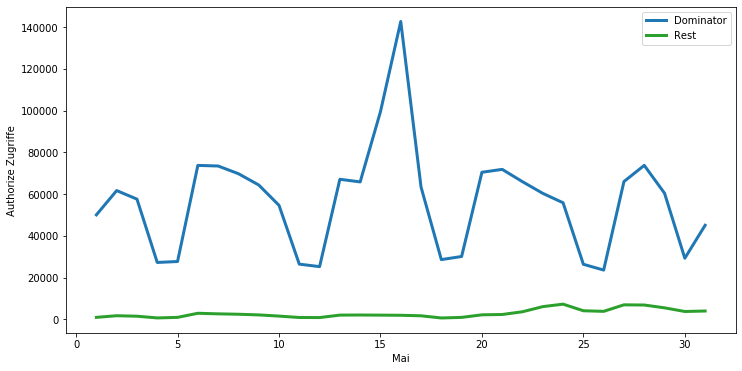

In [33]:
plt.figure(figsize=(12,6))

plt.plot(days, post_values, lw=3, color='C0', label='Dominator')
plt.plot(days, not_post_values, lw=3, color='C2', label='Rest')

plt.xlabel('Mai')
plt.ylabel('Authorize Zugriffe')
plt.legend()

plt.show()

In [34]:
sept_df = auth_df[auth_df['date_month_nr'] == 9]
sept_post_df = sept_df[sept_df['oidc_client_id'] == 'klp-client']

In [35]:
post_calls = sept_post_df.groupby(sept_post_df.date_day, agg='count').sort('date_day', ascending=True)
all_calls = sept_df.groupby(sept_df.date_day, agg='count').sort('date_day', ascending=True)
not_post_values = list(np.array(all_calls['count'].tolist()) - np.array(post_calls['count'].tolist()))
days = post_calls['date_day'].tolist()
post_values = post_calls['count'].tolist()

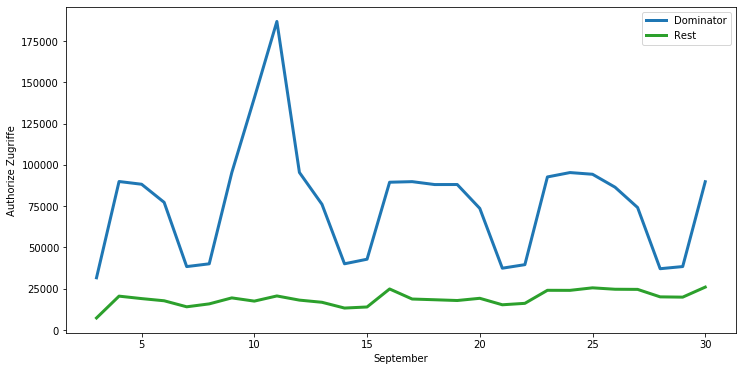

In [36]:
plt.figure(figsize=(12,6))

plt.plot(days, post_values, lw=3, color='C0', label='Dominator')
plt.plot(days, not_post_values, lw=3, color='C2', label='Rest')

plt.xlabel('September')
plt.ylabel('Authorize Zugriffe')
plt.legend()

plt.show()

## Durchschnittliche Zugriffsverteilung innerhalb 24 Stunden

In [37]:
# Create a client ranking ranking list
calls_per_hour = auth_df.groupby(auth_df.date_hour, agg='count').sort('date_hour', ascending=True)
calls_per_hour

#,date_hour,count
0,0,64896
1,1,61265
2,2,67571
3,3,116494
4,4,272920
...,...,...
19,19,629847
20,20,504533
21,21,291257
22,22,149960


In [38]:
days = 30 + 31 + 30 + 31 + 31 + 30
calls_per_hour_2 = [x // days for x in calls_per_hour['count'].tolist()]

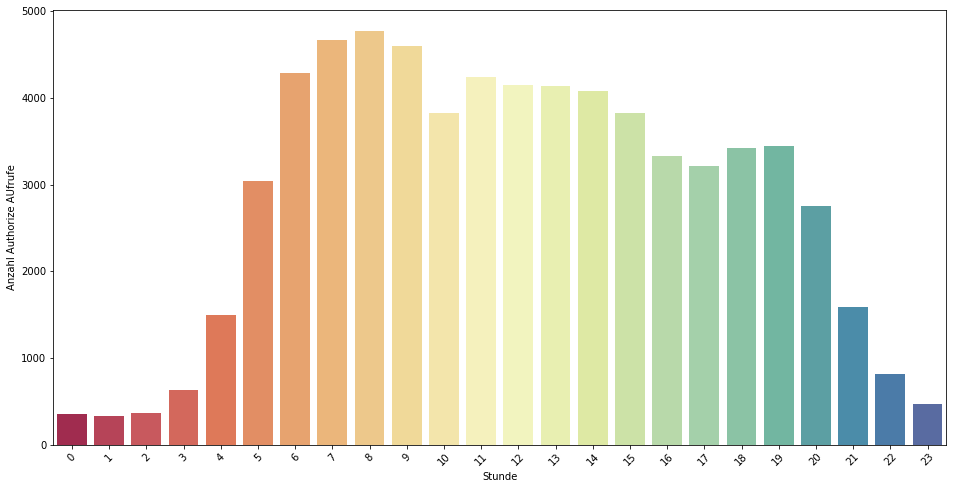

In [39]:
# Plot the result
plt.figure(figsize=(16, 8))
sns.barplot(x=calls_per_hour['date_hour'].tolist(), 
            y=calls_per_hour_2, palette='Spectral')
plt.xlabel('Stunde')
plt.ylabel('Anzahl Authorize AUfrufe')
plt.xticks(rotation='45')
plt.show()

## Wie sieht das für die Wochentage aus?

In [40]:
# Load the authorize dataframe

log_data_2 = base_dir + 'swissid_authorize_logs_april_to_sept_2019.hdf5'

# Read in the data from disk
auth_df_2 = vaex.open(log_data_2)

In [41]:
#auth_df_2

In [42]:
# Helper lists for labelling the plots 
label_month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
label_day_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [43]:
# Treat these columns as label/ordinal encoded values
auth_df_2.categorize(column='date_hour')
auth_df_2.categorize(column='date_weekday')

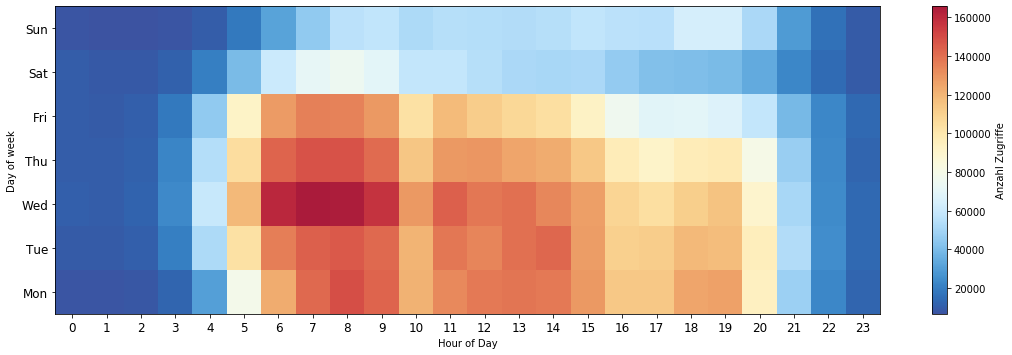

In [44]:
# Plot heatmap with total number of logins
plt.figure(figsize=(15, 5))
auth_df_2.plot('date_hour', 'date_weekday', colorbar=True, colorbar_label='Anzahl Zugriffe', colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Hour of Day')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

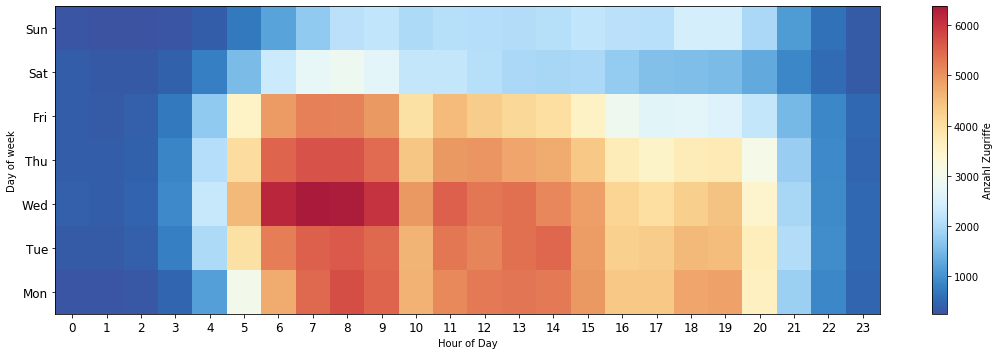

In [45]:
# Plot heatmap, this time with mean values
plt.figure(figsize=(15, 5))
auth_df_2.plot('date_hour', 'date_weekday', what=vaex.stat.count(auth_df_2.date_hour)/26, colorbar=True, colorbar_label='Anzahl Zugriffe', colormap=cm_plusmin)
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(7), label_day_list)
plt.xlabel('Hour of Day')
plt.ylabel('Day of week')
plt.tick_params(labelsize=12)
plt.show()

In [46]:
xycounts = auth_df_2.count(binby=[auth_df_2.date_hour, auth_df_2.date_weekday], limits=[[0, 23], [0, 6]], shape=(24, 7))
#xycounts

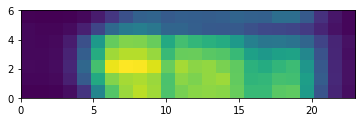

In [47]:
plt.imshow(xycounts.T, origin='lower', extent=[0, 23, 0, 6])
plt.show()

## Klassenverteilung

In [48]:
auth_df_2.groupby(auth_df_2['label'], agg='count').sort('count', ascending=False)

#,label,count
0,suspect,7.41281e+06
1,normal,4.98202e+06
2,anomaly,22769


In [49]:
auth_df_2.count()

array(12417597)